# Assignment 1

### Created by Rahul Mitra on 23.05.2023.
### Submitted for grading to Dr. Valentin Khaydarov on 11.06.2023.

## ------------------------------

In [35]:
"""
Importing necessary modules for 
data analysis and model development
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize

Loading the dataset

In [36]:
# Loading the dataset
data = pd.read_csv("2023-05-17_boiler_dataset_raw.csv")
# Displaying the first 5 rows of dataset
data.head(5)

,Unnamed: 0,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Class
0,0,1.0,283.0,333.0,363.574744,3.0,Lean
1,1,1.0,283.0,333.0,362.349517,3.0,Nominal
2,2,1.0,283.0,333.0,361.216941,3.0,ExcessAir
3,3,1.0,283.0,333.0,4605.482275,3.0,ExcessAir
4,4,1.0,283.0,333.0,359.190662,3.0,ExcessAir


In [37]:
y = data["Class"]
X = data.drop(["Class", "Unnamed: 0"], axis=1)

### Exploratory data analysis 

1. Checking the features.

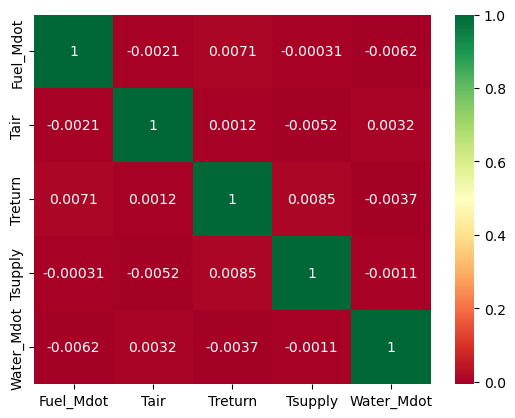

In [38]:
# Plot correlation matrix
corr = X.corr()
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.show()

The features show very low correlation among them, so they can be regarded as independent of each other.

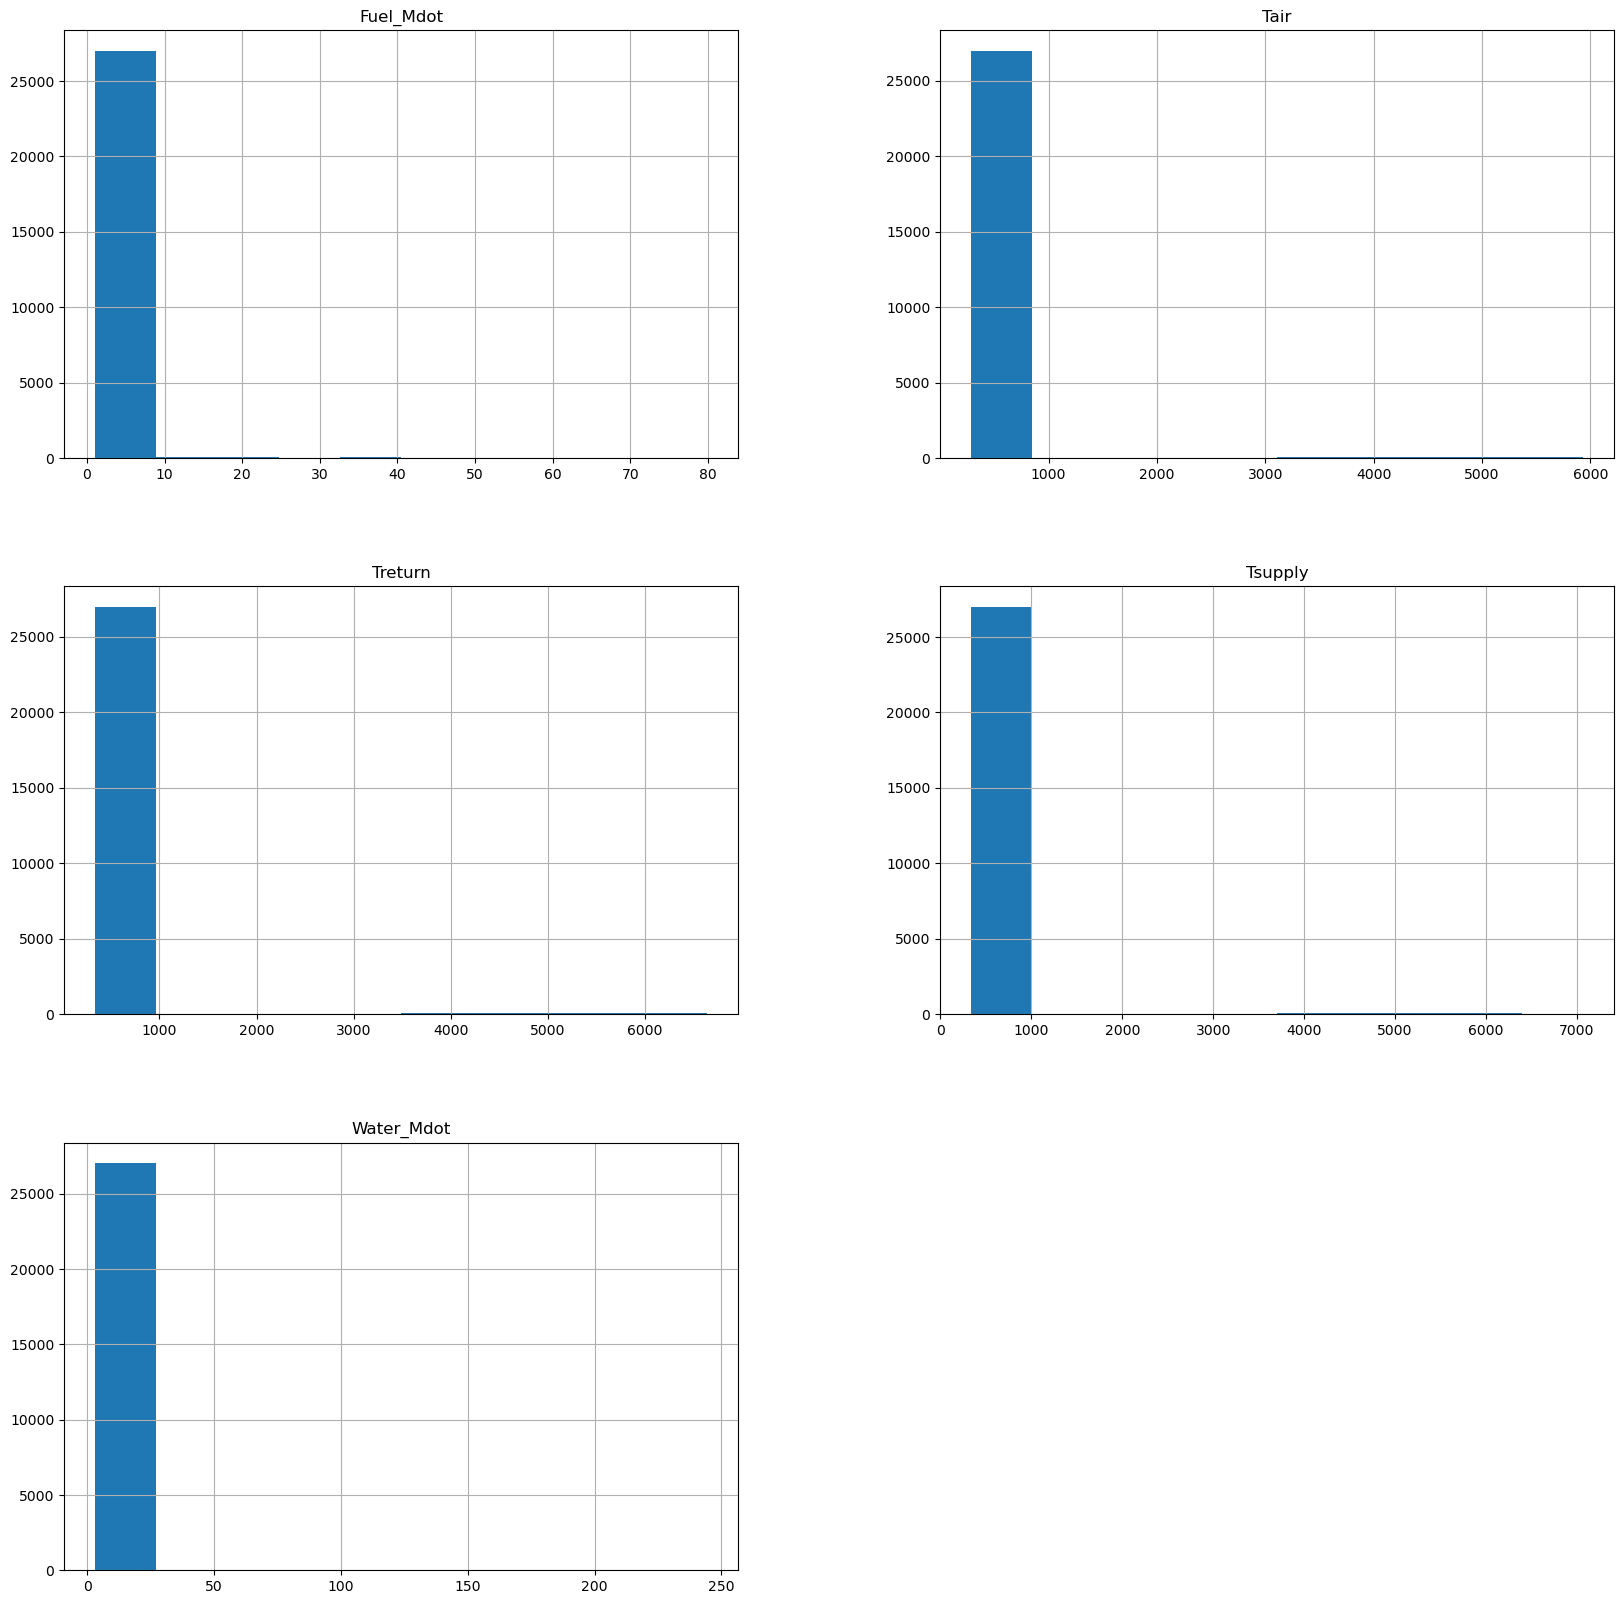

In [39]:
# Plotting the distribution of features
X.hist(figsize=(20, 20))
plt.show()

There are definitely outliers in the features, as it can be seen from the feature distribution.

2. Checking for null values and outlier removal

In [40]:
# Checking for zero data in features
X.isnull().sum()

Fuel_Mdot     0
Tair          0
Treturn       0
Tsupply       0
Water_Mdot    0
dtype: int64

There are no null data in the features.

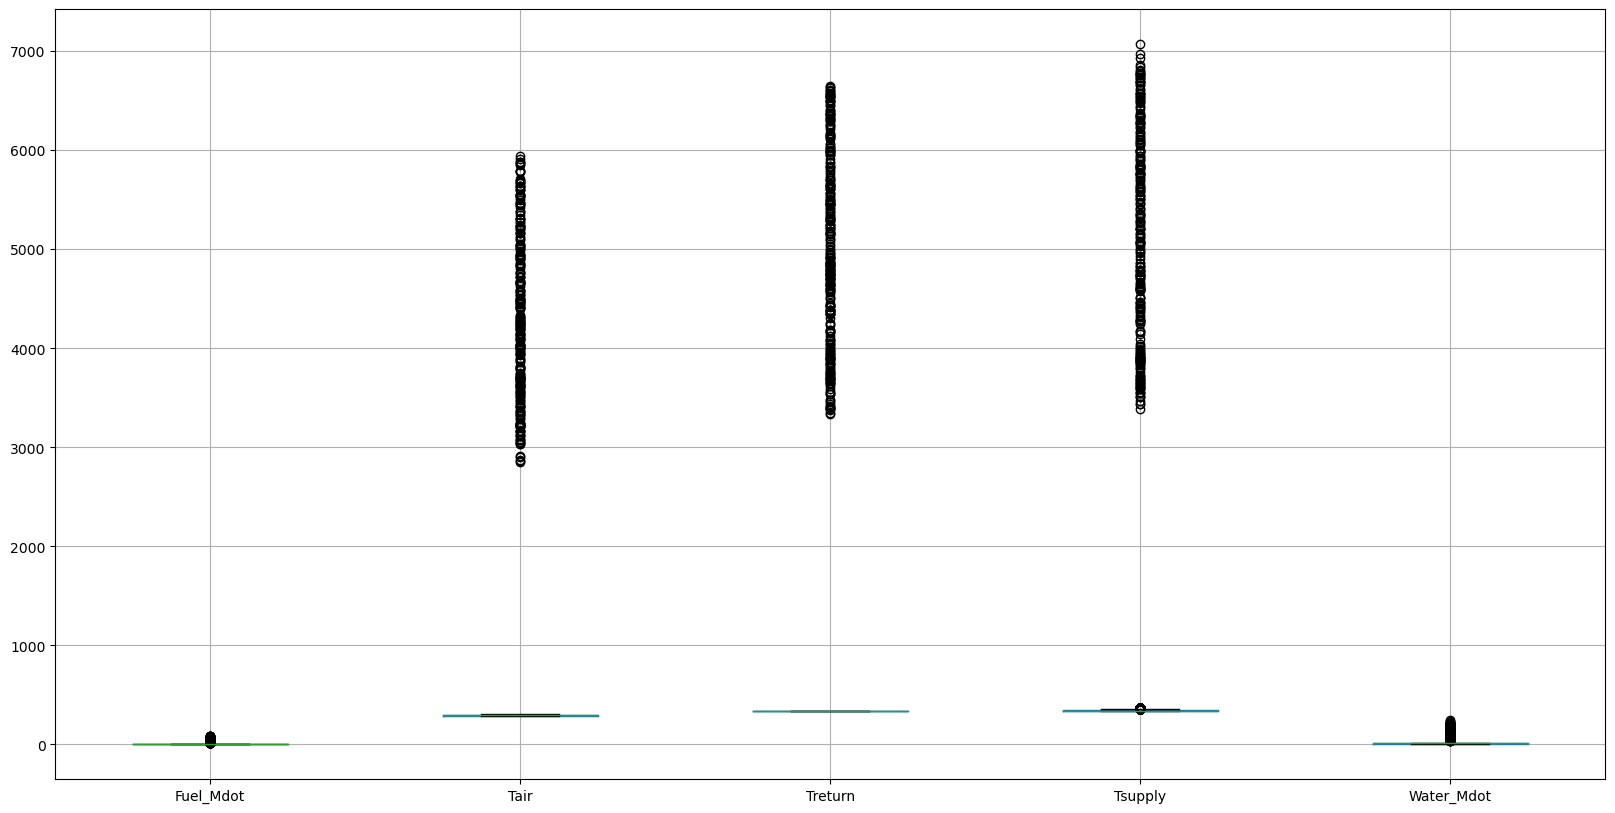

In [41]:
# Checking outliers in features
X.boxplot(figsize=(20, 10))
plt.show()

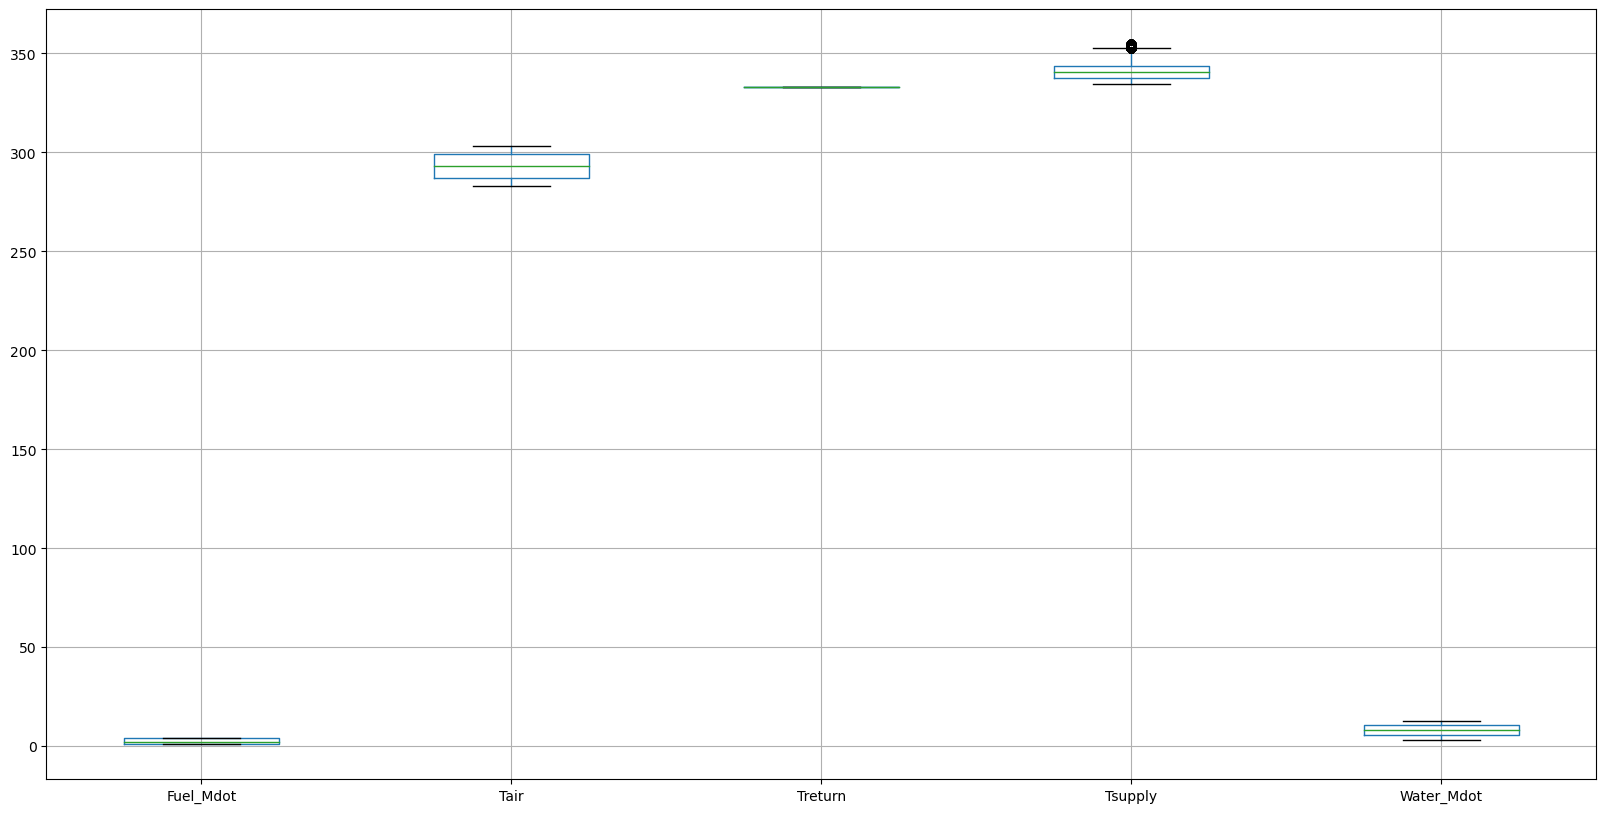

In [42]:
# Removing the outliers in features
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
X.boxplot(figsize=(20, 10))
plt.show()

# Remove the corresponding rows in Target
y = y[X.index]

In [43]:
X.describe()

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
count,24738.000000,24738.00000,2.473800e+04,24738.000000,24738.000000
mean,2.497615,292.98763,3.330000e+02,341.173744,7.960142
std,1.119138,6.32655,9.961226e-08,4.494635,2.779173
min,1.000000,283.00000,3.330000e+02,334.612655,3.000000
25%,1.000000,287.00000,3.330000e+02,337.650235,5.500000
50%,2.000000,293.00000,3.330000e+02,340.349128,8.000000
75%,4.000000,299.00000,3.330000e+02,343.573656,10.500000
max,4.000000,303.00000,3.330000e+02,354.600522,12.500000


Checking the distribution of features again after removing the outliers.

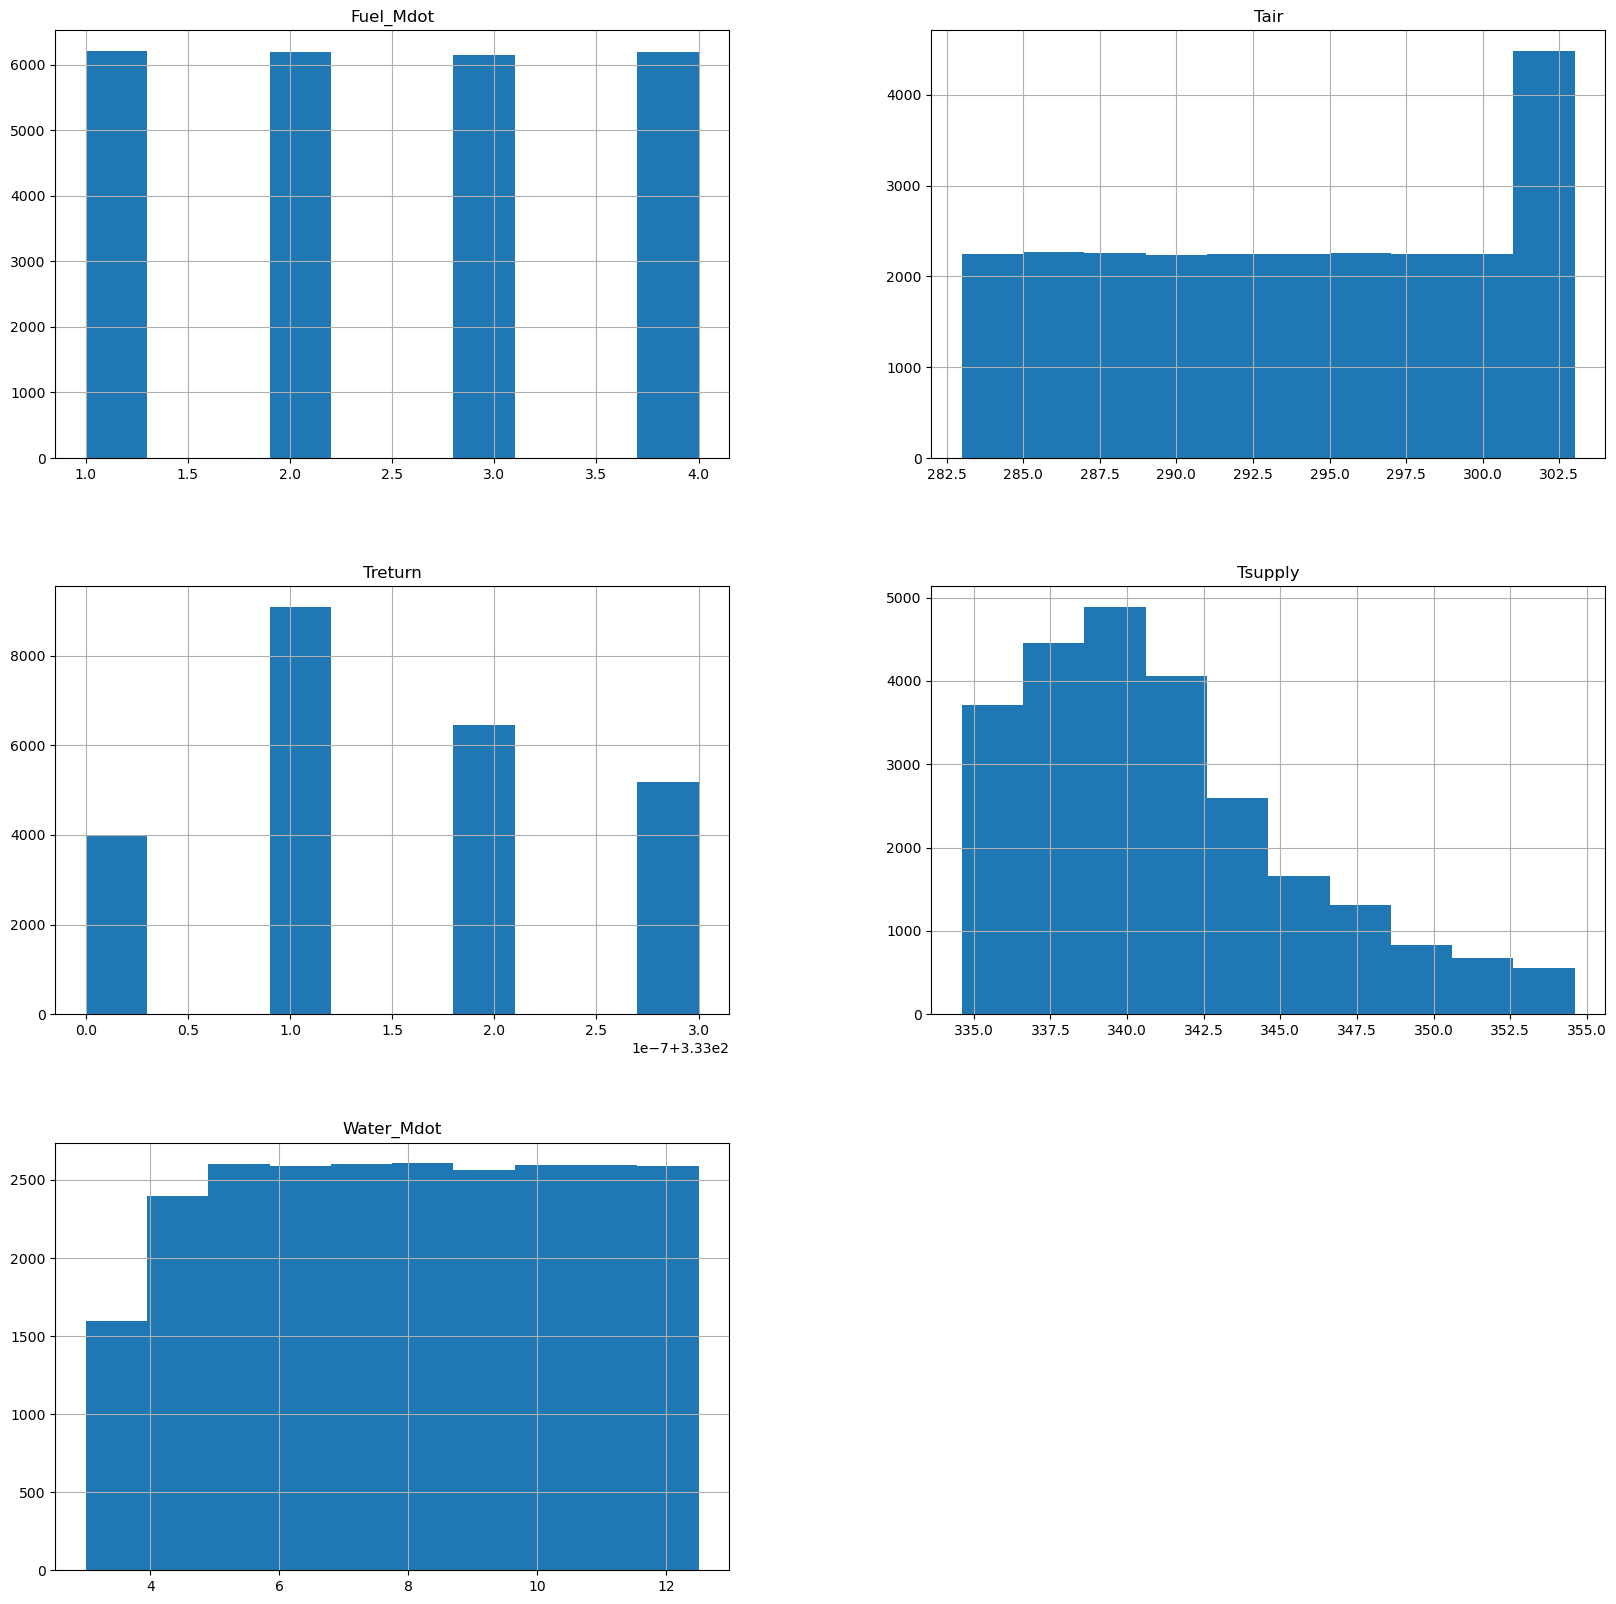

In [44]:
# Plotting the distribution of features
X.hist(figsize=(20, 20))
plt.show()

Checking the homogeneity of the Target values

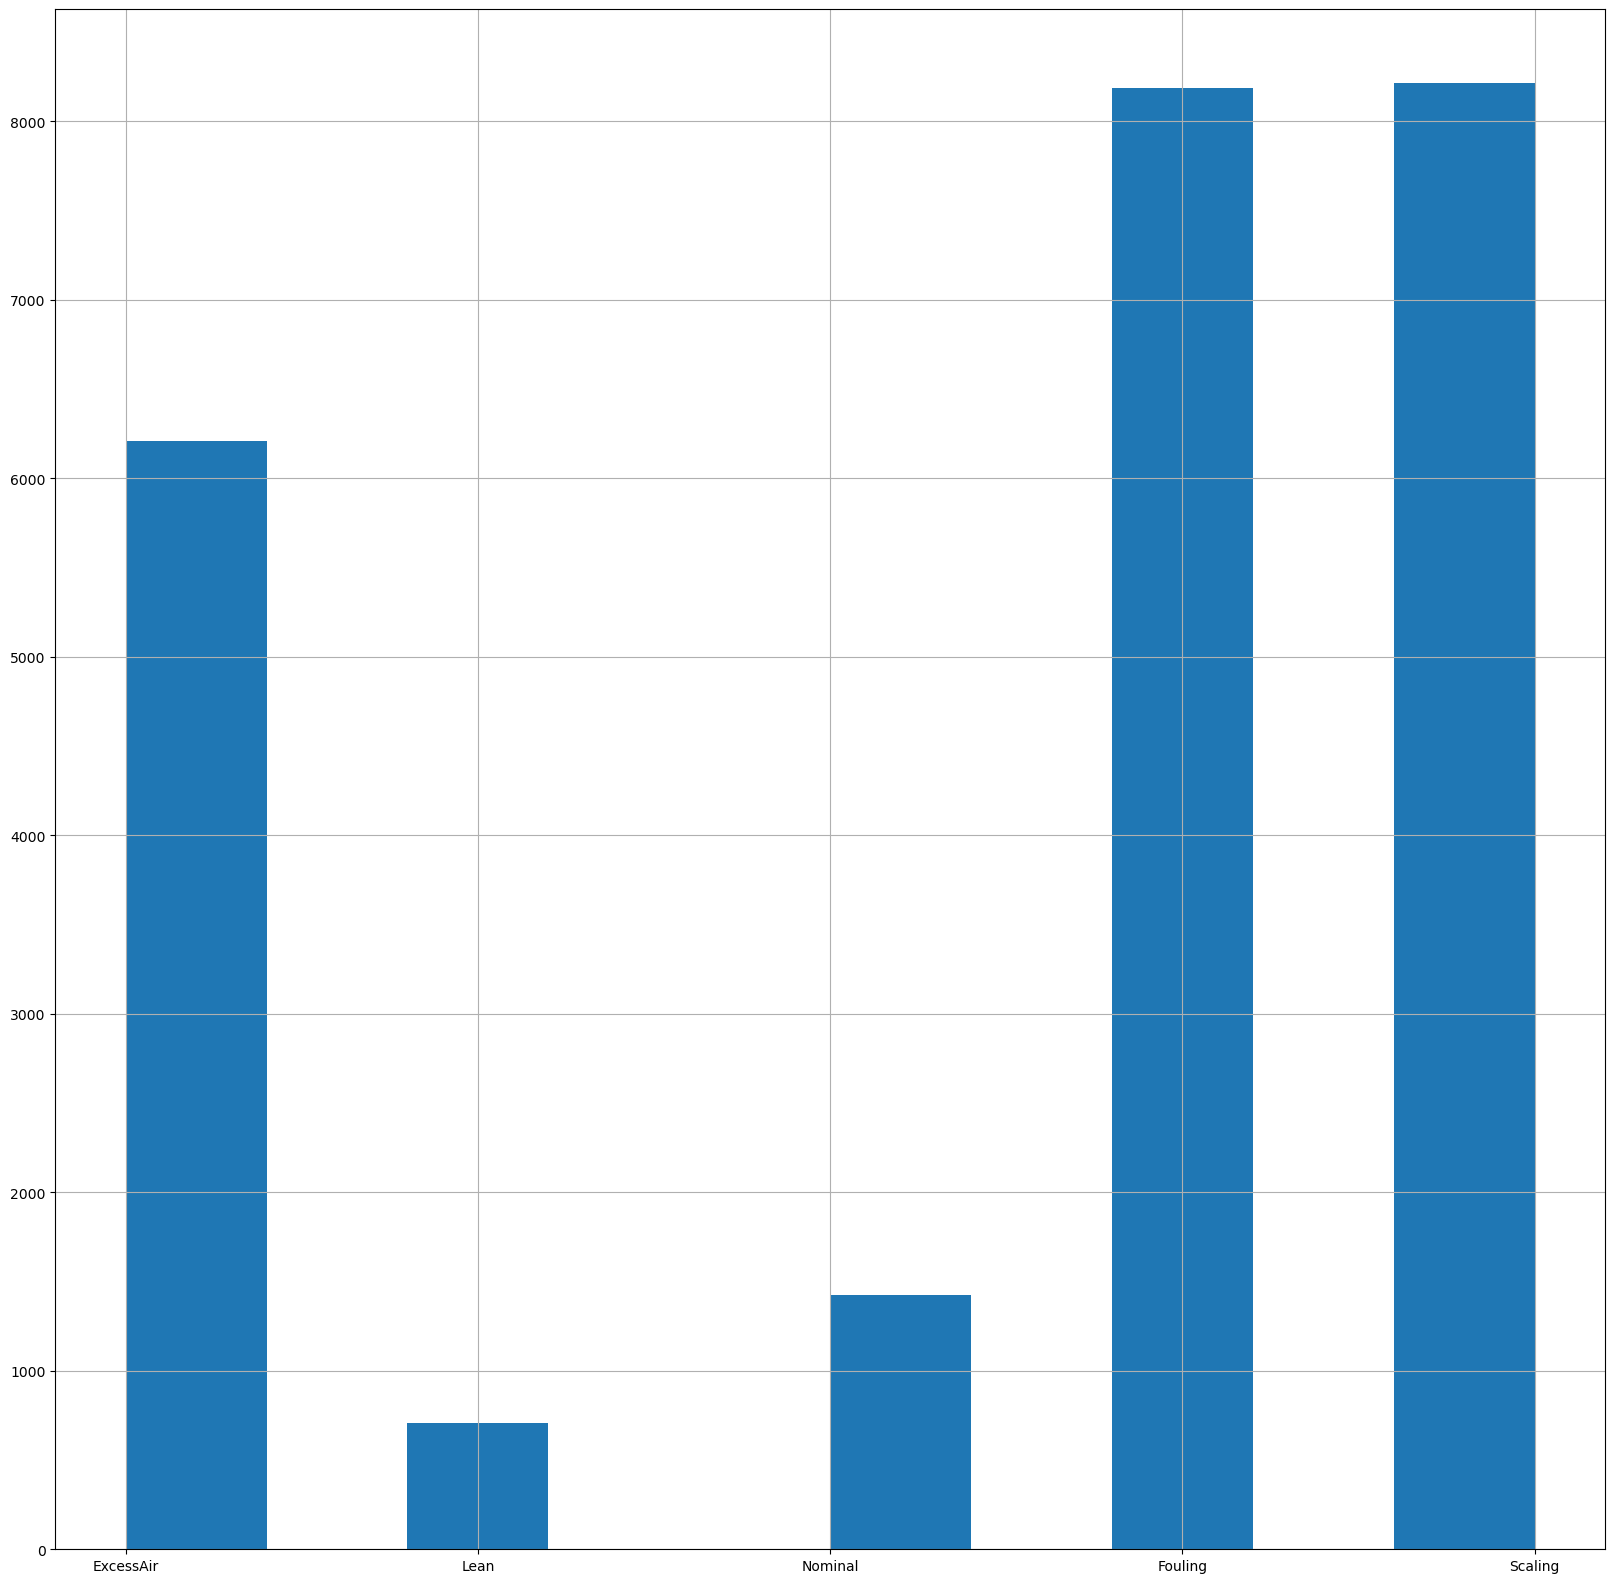

In [45]:
y.hist(figsize=(20,20))
plt.show()

Fouling and Scaling faults have the highest occurences followed by ExcessAir. Normal operation has quite low occurence as compared to the other three faults discussed. Lean fault has the lowest occurence.

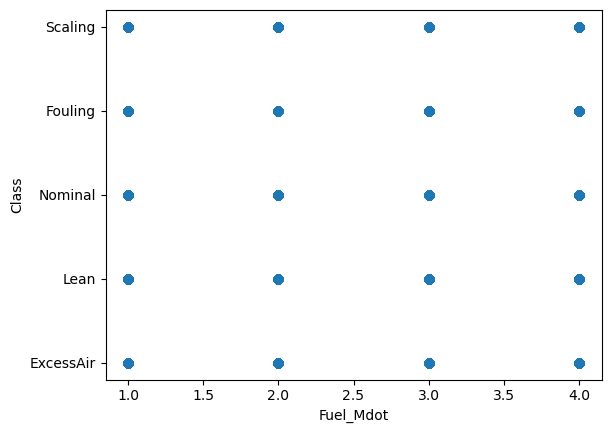

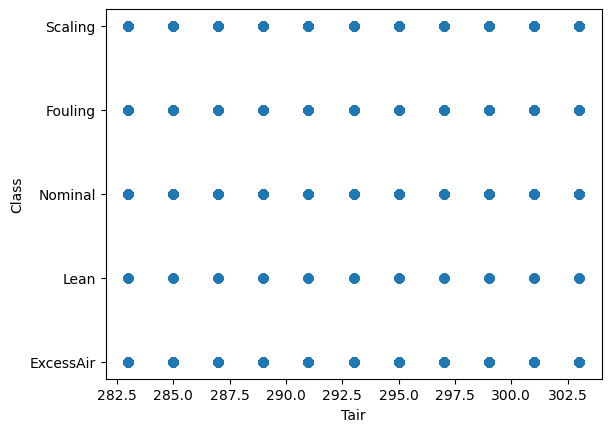

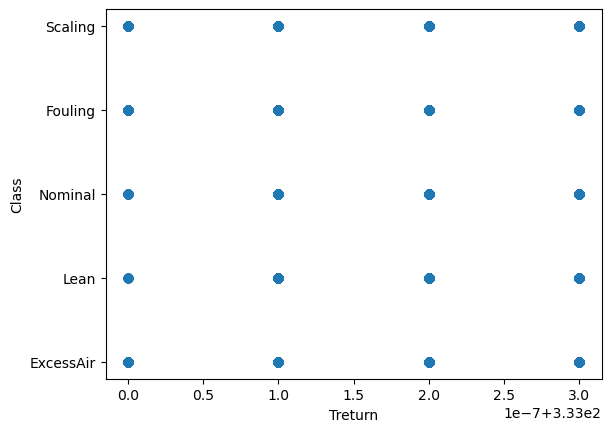

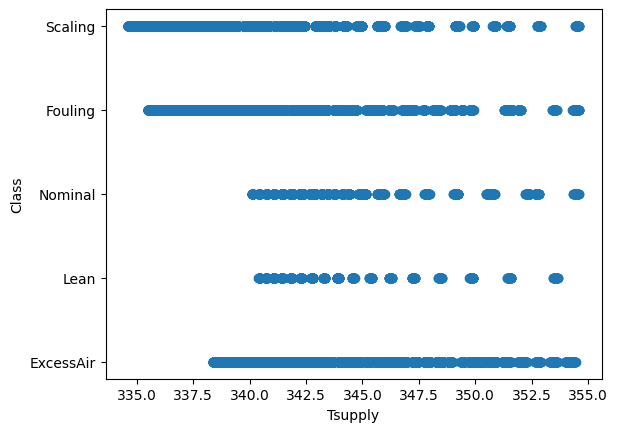

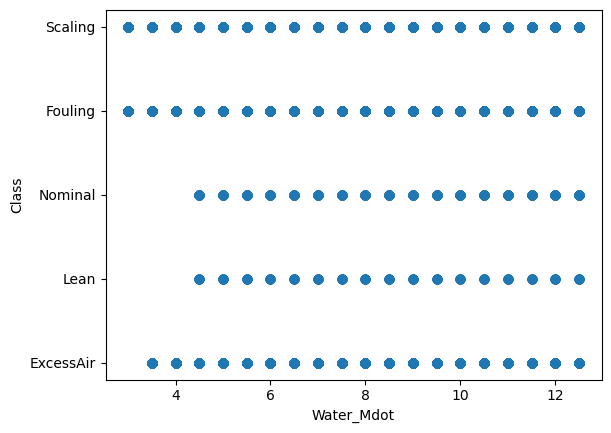

In [46]:
# Plotting target variable y against each feature X
for i in X.columns:
    plt.scatter(X[i], y)
    plt.xlabel(i)
    plt.ylabel("Class")
    plt.show()


Apart from Tsupply, normal operation can be expected for nearly all values of the other features. For Tsupply, normal operation is predominant for moderate values.

### Data transformation and one-hot encoding

In [47]:
# Scaling the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Encoding the Target
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)

# Creating label_to_index and index_to_label transformation
label_to_index = dict((name, index) for index, name in enumerate(encoder.classes_))
index_to_label = dict((index, name) for index, name in enumerate(encoder.classes_))
print(label_to_index)
print(index_to_label)

{'ExcessAir': 0, 'Fouling': 1, 'Lean': 2, 'Nominal': 3, 'Scaling': 4}
{0: 'ExcessAir', 1: 'Fouling', 2: 'Lean', 3: 'Nominal', 4: 'Scaling'}


### Splitting data into training, validation and test dataset.

In [48]:
# Train, validation, test split
X_train1, X_test, y_train1, y_test = train_test_split(scaled_X, encoded_y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.25)

# Checking the shape of the data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14842, 5)
y_train shape:  (14842,)
X_val shape:  (4948, 5)
y_val shape:  (4948,)
X_test shape:  (4948, 5)
y_test shape:  (4948,)


### Fitting classification models

1. Logistic Regression

In [49]:
# Fitting a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Predicting the outcome of the test set
y_pred = log_reg.predict(X_val)
# Checking the accuracy of the model
print("Accuracy: ", accuracy_score(y_val, y_pred))

Accuracy:  0.51535974130962


2. Naive Bayes

In [50]:
# Fitting a naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
# Predicting the outcome
y_pred = nb.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred))

Accuracy:  0.4171382376717866


3. k-NN

In [51]:
# Fitting kNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Predicting the outcome
y_pred = knn.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred))


Accuracy:  0.5749797898140663


4. RandomForest

In [52]:
# Fitting RandomForest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Predicting the outcome
y_pred = rf.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred))

Accuracy:  0.8888439773645918


5. AdaBoost

In [53]:
# Fitting AdaBoost model
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
# Predicting the outcome
y_pred = ada.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred))

Accuracy:  0.27607113985448667


6. Support Vector Machine

In [54]:
# Fitting SVM model
svm = SVC()
svm.fit(X_train, y_train)
# Predicting the outcome
y_pred = svm.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, y_pred))

Accuracy:  0.6515763945028294


RandomForestClassifier had the highest accuracy followed by SVM on the validation data.

### Hyperparameter optimization on RandomForestClassifier and SVM

1. SVM

In [55]:
# Tuning the values of C and gamma and using only the RBF kernel
svm = SVC(probability=True)
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [100, 10, 1, 0.1, 0.01]}
gridSVM = RandomizedSearchCV(svm, param_grid, n_iter=25, cv=3, n_jobs=-1)
gridSVM.fit(X_train, y_train)
print(gridSVM.best_params_)
print(gridSVM.best_estimator_)
grid_predictions = gridSVM.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, grid_predictions))

KeyboardInterrupt: 

2. RandomForest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=5)]
# Create the parameter grid
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
}
rf = RandomForestClassifier()
gridRF = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid, n_iter=25, cv=3, n_jobs=-1)
# Fit the random search model
gridRF.fit(X_train, y_train)
print(gridRF.best_params_)
print(gridRF.best_estimator_)
grid_predictions = gridRF.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, grid_predictions))

{'n_estimators': 325, 'max_depth': 55}
RandomForestClassifier(max_depth=55, n_estimators=325)
Accuracy:  0.8850040420371867


Hyperparameter optimization increased the accuracy of both the models.

### Evaluating the performance of the tuned models on validation data

Checking the confusion matrix for SVM

Accuracy of SVM model:  0.7142279708973323


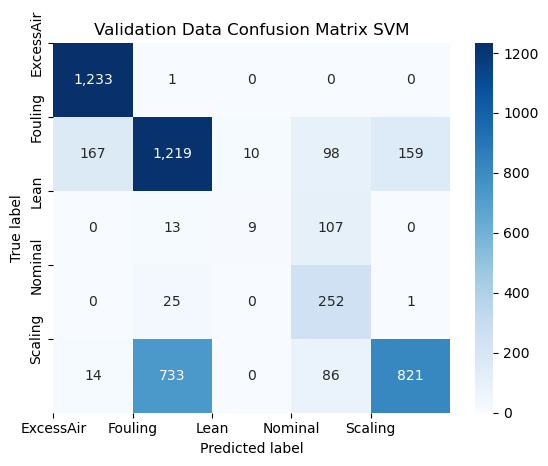

In [ ]:
# Predicting the outcome with tuned SVM
y_pred_svm = gridSVM.predict(X_val)
# Plotting the confusion matrix
x = np.arange(5)
l = [index_to_label[i] for i in range(5)]
cm_svm = confusion_matrix(y_val, y_pred_svm)
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt=",d")
plt.title("Validation Data Confusion Matrix SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.xticks(x,l)
plt.yticks(x,l)
# Printing the accuracy
print("Accuracy of SVM model: ", accuracy_score(y_val, y_pred_svm))
plt.show()

Checking the confusion matrix for RandomForest

Validation Data Accuracy of RandomForest model:  0.8850040420371867


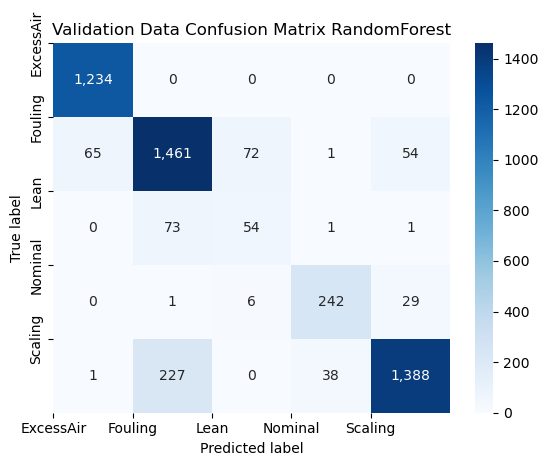

In [ ]:
# Predicting the outcome with tuned RandomForest model
y_pred_rf = gridRF.predict(X_val)
# Plotting the confusion matrix
x = np.arange(5)
l = [index_to_label[i] for i in range(5)]
cm_rf = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt=",d")
plt.title("Validation Data Confusion Matrix RandomForest")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.xticks(x,l)
plt.yticks(x,l)
# Printing the accuracy
print("Validation Data Accuracy of RandomForest model: ", accuracy_score(y_val, y_pred_rf))
plt.show()

In [ ]:
# Checking the metrics on tuned SVM model
precision = precision_score(y_val, y_pred_svm, average=None)
recall = recall_score(y_val, y_pred_svm, average=None)
f1 = f1_score(y_val, y_pred_svm, average=None)

print("Validation data metrics of SVM model")
for i, label in index_to_label.items():
    print(f"Class Label: {label}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1 Score: {f1[i]:.3f}\n")

Validation Data SVM Precision:  [0.87199434 0.61225515 0.47368421 0.4640884  0.83690112]
Validation Data SVM Recall:  [0.99918963 0.73744707 0.06976744 0.90647482 0.49637243]
Validation Data SVM F1 score:  [0.93126888 0.66904501 0.12162162 0.61388551 0.62314991]


#### SVM Model Performance Summary

Precision
Precision is a measure of how many of the predicted positive instances are actually positive. It is defined as the ratio of true positives to the sum of true and false positives.


The model demonstrates the highest precision in predicting 'ExcessAir' and 'Scaling', meaning it is more reliable when it predicts instances as these classes. The model's precision for 'Nominal' is relatively lower, suggesting it might be marking many instances as 'Nominal' that do not actually belong to this class.

Recall
Recall (also known as sensitivity or true positive rate) is a measure of how many of the actual positive instances the model can identify. It is defined as the ratio of true positives to the sum of true positives and false negatives.

The model shows high recall for 'ExcessAir' and 'Nominal', which indicates that it is able to identify most instances of these classes correctly. The recall for 'Lean' is significantly low, suggesting that the model is not effective at recognizing instances of this class.

F1 Score
The F1 score is a composite metric that combines precision and recall. It is defined as the harmonic mean of precision and recall and is a good measure when you want to balance between these two metrics.

The F1 score for 'ExcessAir' is highest, indicating that this class has a good balance of precision and recall in prediction. 'Lean' has the lowest F1 score, which, given the earlier discussed precision and recall values, indicates it is the most challenging class for the model to predict correctly.

Recommendation
These performance metrics suggest potential areas for improving the SVM model. 'Lean', in particular, could benefit from more representative features or from a re-examination of the data distribution in the training set. It is also recommended to consider different machine learning algorithms to improve performance, especially for the classes with low precision and recall. As we shall see in the next part, how the model can be improved using RandomForest instead of SVM.

In [ ]:
# Checking the metrics on tuned RandomForest model
precision = precision_score(y_val, y_pred_rf, average=None)
recall = recall_score(y_val, y_pred_rf, average=None)
f1 = f1_score(y_val, y_pred_rf, average=None)

print("Validation data metrics of RandomForest model")
for i, label in index_to_label.items():
    print(f"Class Label: {label}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1 Score: {f1[i]:.3f}\n")

Validation Data RandomForest Precision:  [0.94923077 0.8291714  0.40909091 0.85815603 0.94293478]
Validation Data RandomForest Recall:  [1.         0.88384755 0.41860465 0.8705036  0.83917775]
Validation Data RandomForest F1 score:  [0.97395422 0.8556369  0.4137931  0.86428571 0.88803583]


#### RandomForest Model Performance Summary

Precision
Precision is a measure of how many of the predicted positive instances are actually positive. 

The RandomForest model shows highest precision for 'Scaling' and 'ExcessAir'. The model's precision for 'Lean' is the lowest, suggesting that when the model predicts an instance as 'Lean', it is less likely to be correct compared to other classes.

Recall
Recall is a measure of how many of the actual positive instances the model can identify. 

The RandomForest model achieves near-perfect recall for 'ExcessAir', and also has high recall for 'Nominal' and 'Fouling'. The model struggles the most with the 'Lean' class, failing to correctly identify a majority of its instances.

F1 Score
The F1 score is the harmonic mean of precision and recall. 

The F1 scores are high for 'ExcessAir', 'Scaling', and 'Nominal', suggesting a good balance of precision and recall for these classes. On the other hand, the 'Lean' class still shows the lowest F1 score, indicating difficulties in correctly predicting this class.

Comparing the RandomForest model to the SVM, we see noticeable improvements across all classes, especially in the 'Lean' class, albeit the performance on this class remains relatively low. It's recommended to further investigate why the 'Lean' class is challenging for both models, and consider strategies such as resampling, gathering more data, or engineering more features for this class. Personal opinion is that 'Lean' class has least number of instances, as we saw in the data exploration section and we need more samples of this class.

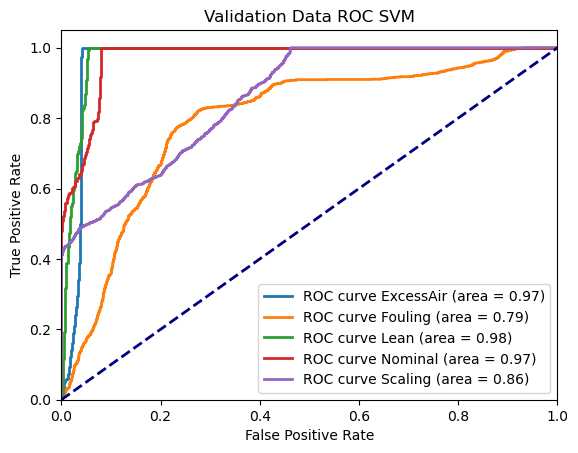

ROC AUC score:  0.9140092515103243


In [ ]:
# Binarize the true labels
y_val_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])

# Calculate the predicted probabilities for each class
y_pred_svm_proba = gridSVM.predict_proba(X_val)

# Calculate the false positive rate (fpr), true positive rate (tpr), and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_svm_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure()
lw = 2

for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve %s (area = %0.2f)" % (index_to_label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation Data ROC SVM")
plt.legend(loc="lower right")
plt.show()

# ROC AUC score overall
print("ROC AUC score: ", roc_auc_score(y_val_bin, y_pred_svm_proba, multi_class="ovr"))

The SVM model achieved an overall ROC AUC score of 0.914. This demonstrates a strong performance in terms of its ability to distinguish between the different classes. This value, being close to 1, shows the model is much better than a random guess (0.5) and indicates a high level of accuracy in its predictions.

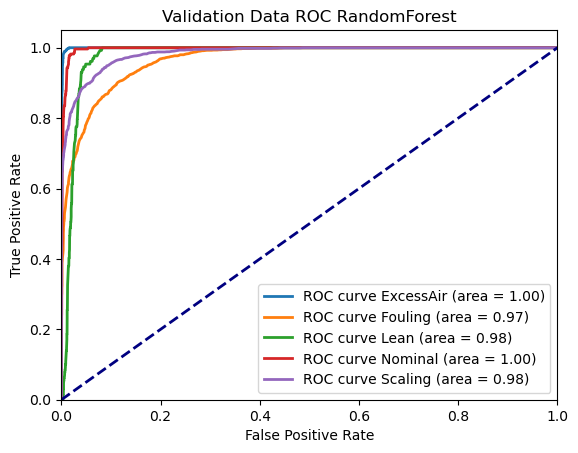

ROC AUC score:  0.9846466537234375


In [ ]:
# Binarize the true labels
y_val_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])

# Calculate the predicted probabilities for each class
y_pred_rf_proba = gridRF.predict_proba(X_val)

# Calculate the false positive rate (fpr), true positive rate (tpr), and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_rf_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure()
lw = 2

for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=lw, label="ROC curve %s (area = %0.2f)" % (index_to_label[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation Data ROC RandomForest")
plt.legend(loc="lower right")
plt.show()

# ROC AUC score overall
print("ROC AUC score: ", roc_auc_score(y_val_bin, y_pred_rf_proba, multi_class="ovr"))

The RandomForest model demonstrated an impressive overall ROC AUC score of 0.984. This highlights the model's robust performance in distinguishing between the different classes. As this score is very close to 1, it underlines the model's high degree of accuracy in its predictions, making it a reliable tool for classification tasks in this context.

### Evaluating the performance of the tuned models on test data

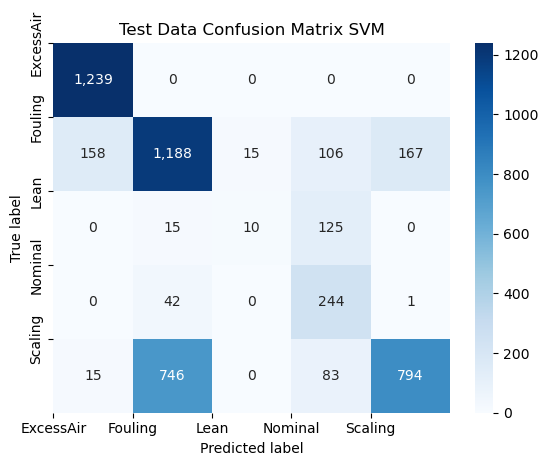

Test Accuracy of SVM model:  0.702303961196443


In [ ]:
# Testing the tuned SVM model on test data
y_pred_svm_test = gridSVM.predict(X_test)
# Plotting the confusion matrix
x = np.arange(5)
l = [index_to_label[i] for i in range(5)]
cm_svm_test = confusion_matrix(y_test, y_pred_svm_test)
sns.heatmap(cm_svm_test, annot=True, cmap="Blues", fmt=",d")
plt.title("Test Data Confusion Matrix SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.xticks(x,l)
plt.yticks(x,l)
plt.show()
# Printing the accuracy
print("Test Accuracy of SVM model: ", accuracy_score(y_test, y_pred_svm_test))

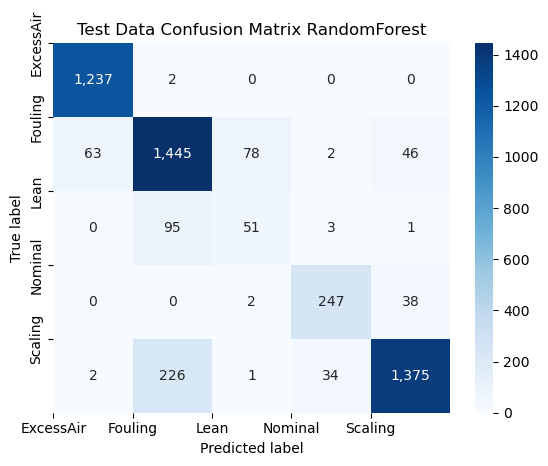

Test Accuracy of RandomForest model:  0.8801535974130962


In [ ]:
# Testing the tuned random forest model on test data
y_pred_rf_test = gridRF.predict(X_test)
# Plotting the confusion matrix
x = np.arange(5)
l = [index_to_label[i] for i in range(5)]
cm_rf_test = confusion_matrix(y_test, y_pred_rf_test)
sns.heatmap(cm_rf_test, annot=True, cmap="Blues", fmt=",d")
plt.title("Test Data Confusion Matrix RandomForest")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.xticks(x,l)
plt.yticks(x,l)
plt.show()
# Printing the accuracy
print("Test Accuracy of RandomForest model: ", accuracy_score(y_test, y_pred_rf_test))

Both models show similar accuracy in case of test data as compared to validation data.

In [ ]:
# Checking the metrics of tuned SVM model on test data
precision = precision_score(y_test, y_pred_svm_test, average=None)
recall = recall_score(y_test, y_pred_svm_test, average=None)
f1 = f1_score(y_test, y_pred_svm_test, average=None)

print("Test data metrics of SVM model")
for i, label in index_to_label.items():
    print(f"Class Label: {label}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1 Score: {f1[i]:.3f}\n")

Test Data SVM Precision:  [0.87747875 0.59668508 0.4        0.43727599 0.82536383]
Test Data SVM Recall:  [1.         0.72705018 0.06666667 0.85017422 0.48473748]
Test Data SVM F1 score:  [0.93474161 0.65544828 0.11428571 0.57751479 0.61076923]


In terms of precision, the SVM model performed best for class 'ExcessAir' and 'Scaling' but not as well for 'Lean' and 'Nominal' classes. This indicates that when the model predicts 'ExcessAir' or 'Scaling', it is usually correct, while it often mistakes 'Lean' and 'Nominal' for other classes.

The recall scores show that 'ExcessAir' and 'Nominal' classes are well-identified, but 'Lean' class is poorly identified. This means that the model is able to identify most instances of 'ExcessAir' and 'Nominal', but misses a lot of actual 'Lean' instances.

Finally, the F1 score, which balances precision and recall, is highest for 'ExcessAir' and lowest for 'Lean'. This indicates that the model performs best overall in identifying 'ExcessAir' and worst at identifying 'Lean'.

In [ ]:
# Checking the metrics on tuned RandomForest model
precision = precision_score(y_test, y_pred_rf_test, average=None)
recall = recall_score(y_test, y_pred_rf_test, average=None)
f1 = f1_score(y_test, y_pred_rf_test, average=None)

print("Test data metrics of RandomForest model")
for i, label in index_to_label.items():
    print(f"Class Label: {label}")
    print(f"Precision: {precision[i]:.3f}")
    print(f"Recall: {recall[i]:.3f}")
    print(f"F1 Score: {f1[i]:.3f}\n")

Test Data RandomForest Precision:  [0.9500768  0.81730769 0.38636364 0.86363636 0.94178082]
Test Data RandomForest Recall:  [0.99838579 0.88433293 0.34       0.86062718 0.83943834]
Test Data RandomForest F1 score:  [0.97363243 0.84950029 0.36170213 0.86212914 0.88766946]


The RandomForest model showed very high precision for 'ExcessAir', 'Nominal', and 'Scaling' classes indicating that when the model predicts these classes, it is often correct. The model had comparatively lower precision for 'Lean', meaning it often confuses this class with others.

In terms of recall, the RandomForest model performed exceptionally well for 'ExcessAir' class and reasonably well for 'Fouling', 'Nominal', and 'Scaling' classes. However, the model was less successful in correctly identifying 'Lean' instances, missing a good percentage of them.

Lastly, the F1 score, showed the model's best performance on 'ExcessAir' and least performance on 'Lean'. This indicates that the model is best at identifying 'ExcessAir' instances and worst at 'Lean'.

In [ ]:
# Test classification report RF
print(classification_report(y_test, y_pred_rf_test))
# Test classification report SVM
print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1239
           1       0.82      0.88      0.85      1634
           2       0.39      0.34      0.36       150
           3       0.86      0.86      0.86       287
           4       0.94      0.84      0.89      1638

    accuracy                           0.88      4948
   macro avg       0.79      0.78      0.79      4948
weighted avg       0.88      0.88      0.88      4948

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1239
           1       0.60      0.73      0.66      1634
           2       0.40      0.07      0.11       150
           3       0.44      0.85      0.58       287
           4       0.83      0.48      0.61      1638

    accuracy                           0.70      4948
   macro avg       0.63      0.63      0.58      4948
weighted avg       0.73      0.70      0.69      4948



After evaluating the performance of both the SVM and RandomForest classifiers, it is clear that the RandomForest model is the better choice for this multi-class classification task.

The RandomForest model demonstrated superior performance across all metrics and all classes when compared to the SVM model. Particularly, it demonstrated high precision across classes 'ExcessAir', 'Nominal', and 'Scaling', implying that the model often accurately predicts these classes. Furthermore, it showcased strong recall for classes 'ExcessAir', 'Fouling', 'Nominal', and 'Scaling', suggesting that it is effective at correctly identifying instances of these classes. Even in the case of the 'Lean' class, where both models struggled, the RandomForest model outperformed the SVM model.

When we look at the F1 scores, which balance the trade-off between precision and recall, the RandomForest model continues to outperform the SVM model across all classes. The superior F1 scores indicate that the RandomForest model is more balanced and provides more reliable and consistent predictions.

Moreover, the ROC AUC scores for the RandomForest model were notably higher than the SVM model, both on the validation and test datasets. This means the RandomForest model is better at distinguishing between classes, increasing the likelihood of correct predictions.

Considering all these points, the RandomForest model would be the recommended choice for this classification task due to its overall superior and balanced performance.

----------------------------------------------------------------------------------------------------------------------------------------------